# Análisis Comparativo Método FSDS
A través del siguiente notebook se busca detallar cuáles son las diferencias en las distribuciones entre el conjunto de muestra del dataframe de Enero y la muestra Sintética creada a partir del método inicial de FSDS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
muestra = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_agrupado\Sample_Enero.csv")
display(muestra.tail())
display(muestra.shape)

,ZONA_TERRITORIAL,FACTOR_EXPANSION,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,COMUNIDAD_ES_CAMPESINA,...,TIPO_OCUPACION_VIVIENDA,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD
495,Cabecera,367.262109,BOLIVAR,Masculino,20,"Hijo(a), hijastro(a)",Si,Si,No,No,...,"Propia, totalmente pagada",No,Si,No,No,No,No,No,5,Sin discapacidad
496,Cabecera,46.866608,CHOCO,Femenino,24,Jefe (a) del hogar,No,Fallecido,No,No,...,En arriendo o subarriendo,No,No,No,No,No,No,No,4,Sin discapacidad
497,Cabecera,102.164440,QUINDIO,Femenino,21,"Pareja, esposo(a), conyuge, companero(a)",No,No,No,No,...,"Propia, totalmente pagada",No,Si,No,No,No,No,No,3,Sin discapacidad
498,Cabecera,238.983642,MAGDALENA,Femenino,25,"Hijo(a), hijastro(a)",Si,Fallecido,No,No,...,Posesion sin titulo,No,No,No,No,No,No,No,4,Sin discapacidad
499,Cabecera,2134.701720,TOLIMA,Femenino,24,Jefe (a) del hogar,No,No,Si,No,...,Posesion sin titulo,No,No,No,No,No,No,No,2,Sin discapacidad


(500, 43)

In [9]:
syntetic = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_agrupado\Syntetic_Enero.csv")
display(syntetic.tail())
display(syntetic.shape)

,ZONA_TERRITORIAL,FACTOR_EXPANSION,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,COMUNIDAD_ES_CAMPESINA,...,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD,Adjusted_Weight
825,Cabecera,85.581142,TOLIMA,Masculino,23.048518,"Hijo(a), hijastro(a)",Si,No,No,No,...,No,Si,No,No,No,No,No,2.974763,Sin discapacidad,217.846008
826,Cabecera,105.301849,ANTIOQUIA,Femenino,20.303359,"Hijo(a), hijastro(a)",Si,Si,No,No,...,No,Si,No,No,No,No,No,3.000000,Sin discapacidad,123.215913
827,Cabecera,157.973575,META,Masculino,25.855382,Jefe (a) del hogar,No,No,Si,No,...,No,Si,No,No,No,No,No,3.000000,Sin discapacidad,7.344918
828,Cabecera,329.221351,ANTIOQUIA,Femenino,27.899130,Jefe (a) del hogar,No,No,No,No,...,No,Si,No,No,No,No,No,2.213525,Sin discapacidad,18.353044
829,Cabecera,157.973575,META,Masculino,24.903127,Jefe (a) del hogar,No,No,Si,No,...,No,Si,No,No,No,No,No,3.000000,Sin discapacidad,7.675417


(830, 44)

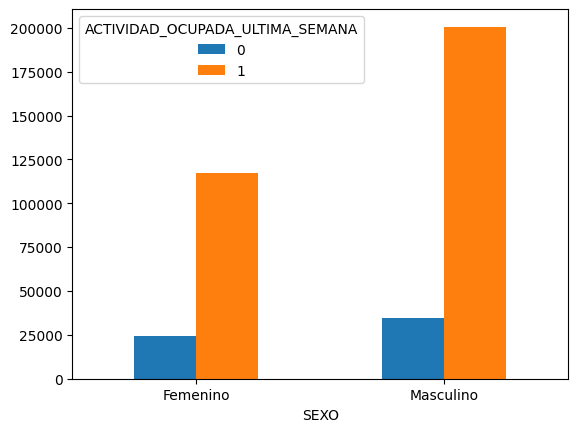

In [31]:
contingencia_muestra_sexo = pd.crosstab(columns = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = muestra['SEXO'], 
                                        aggfunc = 'sum', 
                                        values = muestra['FACTOR_EXPANSION'])
# Visualización
contingencia_muestra_sexo.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

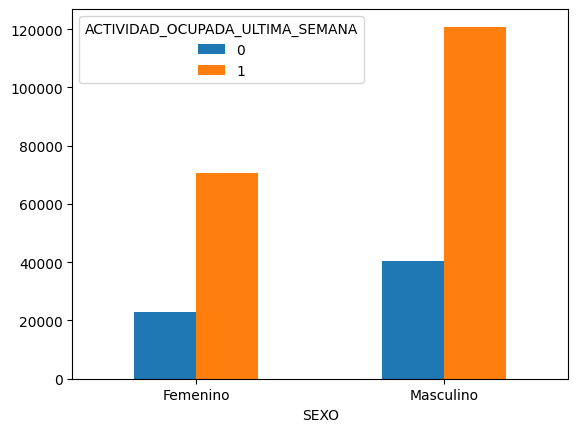

In [32]:
contingencia_muestra_sexo = pd.crosstab(columns = syntetic['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = syntetic['SEXO'], 
                                        aggfunc = 'sum', 
                                        values = syntetic['Adjusted_Weight'])
# Visualización
contingencia_muestra_sexo.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [40]:
def visualizacion_categoricas(label:str):
    cross_muestra = pd.crosstab(columns = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = muestra[label], 
                                        aggfunc = 'sum', 
                                        values = muestra['FACTOR_EXPANSION'])
    cross_sintetico = pd.crosstab(columns = syntetic['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = syntetic[label], 
                                        aggfunc = 'sum', 
                                        values = syntetic['Adjusted_Weight'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Frecuencia Normal')  # Eliminar la leyenda en axes[0]

    axes[1].set_title('Frecuencia con Pesos')
    cross_muestra.plot(kind='bar',  ax=axes[0], alpha=0.7, legend=False)
    cross_sintetico.plot(kind='bar', ax=axes[1], alpha=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

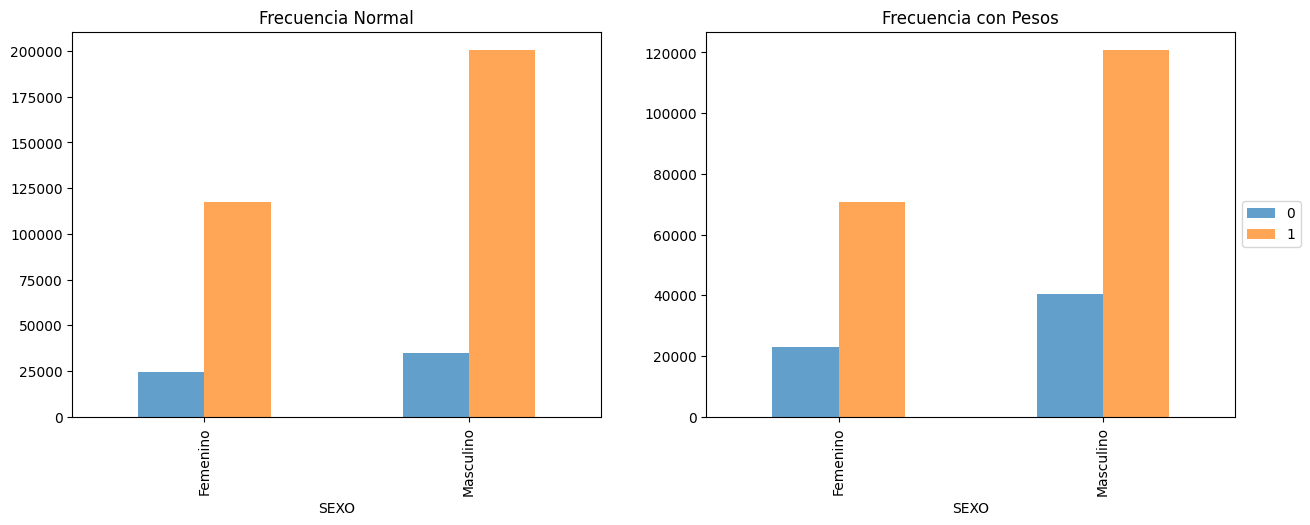

In [41]:
visualizacion_categoricas('SEXO')

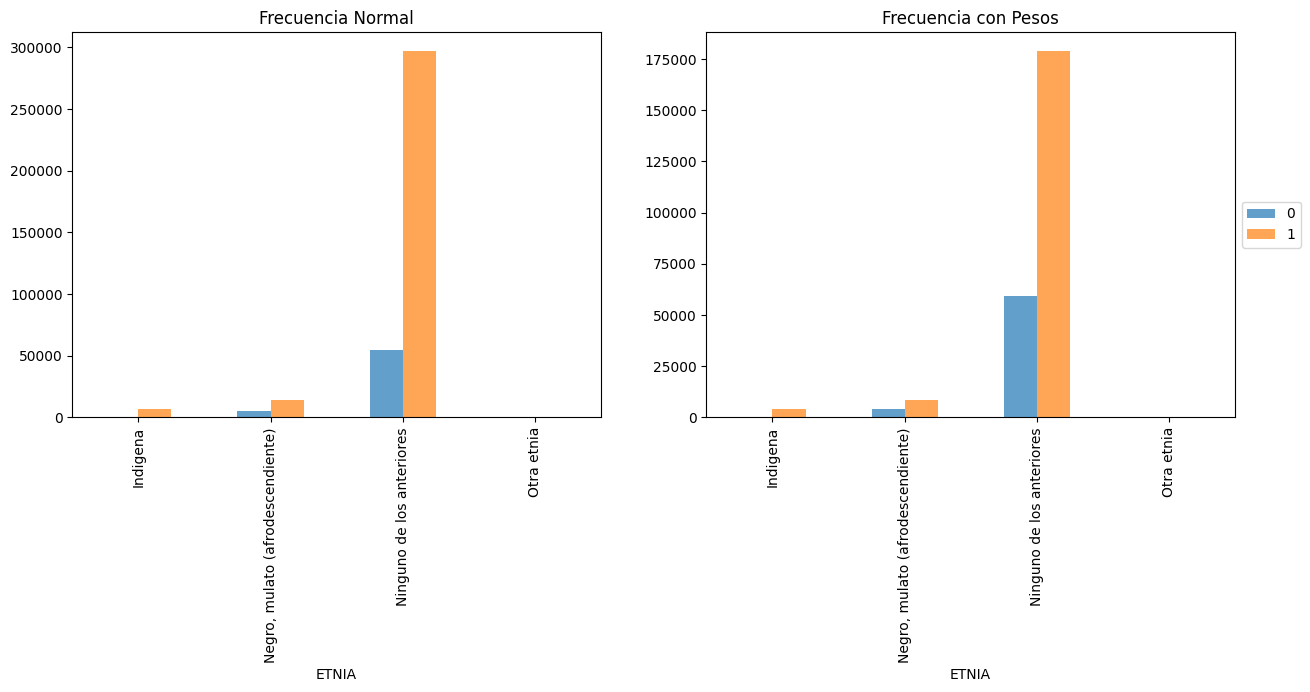

In [42]:
visualizacion_categoricas('ETNIA')

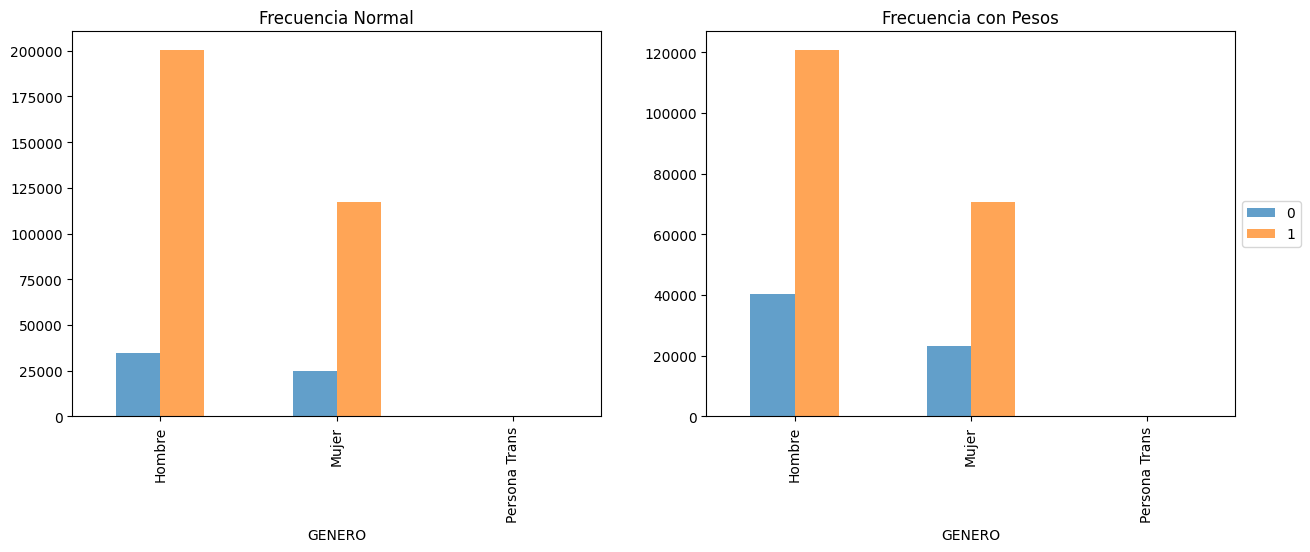

In [43]:
visualizacion_categoricas('GENERO')

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [103]:
# Muestra con pesos
X = muestra.drop(columns=['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'])
y = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA']

In [126]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=213, shuffle=True)

Test_weights = X_test['FACTOR_EXPANSION']
X_test = X_test.drop(columns='FACTOR_EXPANSION')

train_weights = X_train['FACTOR_EXPANSION']
X_train = X_train.drop(columns='FACTOR_EXPANSION')

In [127]:
categoric_vars = X_test.select_dtypes(include=['object']).columns.to_list()
numeric_vars = X_test.select_dtypes(include=['int64','float64']).columns.to_list()

In [128]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(drop='first'), categoric_vars)
    ])

In [129]:
pipeline = Pipeline(steps=[('Procesamiento', preproccessing)])

In [130]:
X_train_transformed = pipeline.fit_transform(X_train, y_train).toarray()

In [131]:
lm = LogisticRegression()
lm.fit(X_train_transformed, y_train, sample_weight=train_weights)

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
X_test_transformed = pipeline.transform(X_test)

ValueError: Found unknown categories ['Persona Trans'] in column 15 during transform